<a href="https://colab.research.google.com/github/jiho01/Self-driving_AI/blob/main/0704_Matplotlib_Mission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Misson 1

In [ ]:
import matplotlib.pyplot as plt

def setup_basic_plot(step_num=1, action='forward'):
    # 3*3 크기의 플롯과 축 생성
    fig, ax = plt.subplots(figsize=(3, 3))

    #x, y축 설정
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)

    #타이틀과 라벨 성정
    ax.set_title(f"Step_{step_num} : {action}", fontsize=15)
    ax.set_xlabel("X_axis", fontsize=15)
    ax.set_ylabel("Y_axis", fontsize=15)

    #레이아웃 자동조절
    plt.tight_layout()
    return ax


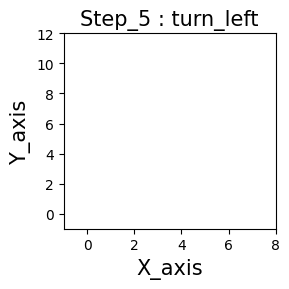

In [ ]:
if __name__ == "__main__":
  ax = setup_basic_plot(5, "turn_left")
  plt.show()

#📝 Mission 2: 목표선 그리기 함수 만들기



🎯 조건:
- import matplotlib.pyplot as plt
1. 함수 정의: def draw_goal_line(obstacles):
  - 매개변수: obstacles (장애물들의 집합/리스트)
2. 캔버스 설정:
  - 크기: figsize=(8, 6)
  - 축 범위: X(-1, 8), Y(-1, 12)
  - 격자: grid(True, alpha=0.3)
3. 표선 계산:
  - 가장 높은 장애물의 Y좌표 찾기
  - 목표선 = 최대 Y좌표 + 3
  - 장애물이 없으면 Y=0 기준
4. 목표선 그리기:
  - 초록색 수평선 (color='lime')
  - 선 두께: linewidth=3
  - 투명도: alpha=0.7
5. 텍스트 표시:
  - 위치: (7, goal_y + 0.2)
  - 내용: f-string으로 "GOAL (y={goal_y})" 표시
  - 색상: 초록색
6. 완성 요소:
  - 범례 표시 (ax.legend())
  - 레이아웃 최적화
  - 화면 출력
  - goal_y 값 반환
7. 실행:
  - obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)} 사용
  - 함수 호출해서 결과 확인

💡 힌트:
- ax.axhline(): 수평선 그리기
-max() 함수와 조건부 표현식 활용
-ax.text()의 ha, va 매개변수 사용

In [ ]:
import matplotlib.pyplot as plt

def draw_goal_line(obstacles):

    # 캔버스 설정
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)
    ax.grid(True, alpha=0.3)

    # 목표선 계산     - y좌표가 가장 큰 장애물 찾아서 + 3 없으면 0 기준
    max_y = max(y for _, y in obstacles) if obstacles else 0
    goal_y = max_y + 3

    # 목표선 그리기   - 초록색 수평선(lime), 선 두께(3), 투명도(0.7)
    ax.axhline(y=goal_y, color='lime', linewidth=3, alpha=0.7, label='Goal Line')

    # 텍스트 표시     - 위치(7, goal_y + 2)
    ax.text(7, goal_y + 0.2, f"GOAL (y={goal_y})", color='lime', ha='right', va='bottom')

    # 완성 요소
    ax.legend()
    plt.tight_layout()
    plt.show()

    return goal_y

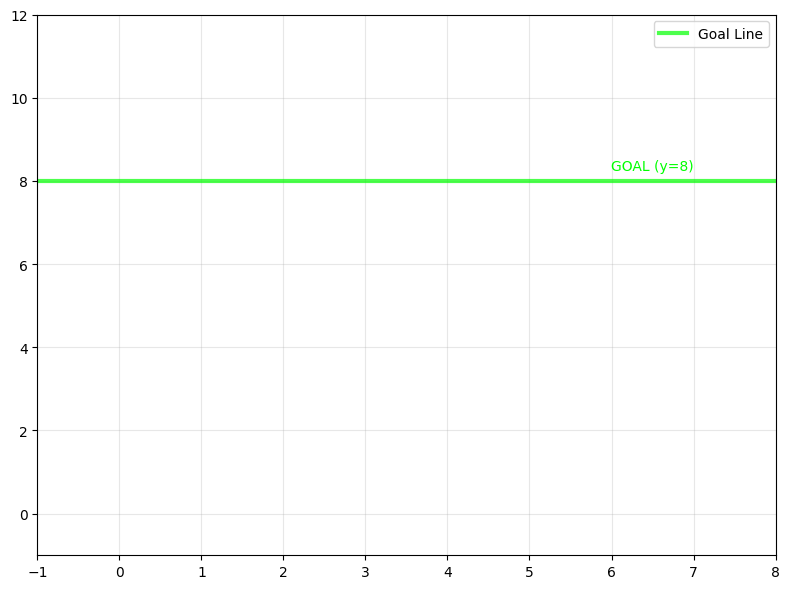

goal_y: 8


In [ ]:
obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)}
goal_y = draw_goal_line(obstacles)
print(f"goal_y: {goal_y}")

#📝 Mission 3 : 장애물 그리기 함수 만들기


🎯 조건:
- import matplotlib.pyplot as plt
- from matplotlib.patches import Rectangle
1. 함수 정의: def draw_obstacles(obstacles):
  - 매개변수: obstacles (장애물 위치들의 set 또는 list)
2. 캔버스 설정:
  - 크기: figsize=(8, 6)
  - 축 범위:
    - ax.set_xlim(-1, 8)   # X축 범위: -1 ~ 8
    - ax.set_ylim(-1, 12)  # Y축 범위: -1 ~ 12
  - 정사각형 비율: set_aspect('equal')
  - 격자와 라벨 설정
3. 데이터 처리:
  - set을 list로 변환하여 순서 보장
  - isinstance() 함수로 타입 확인
4. 장애물 그리기:
  - 빨간색 사각형 (color='red', alpha=0.7)
  - 크기: 0.8 x 0.8
  - 중심 좌표에서 0.4씩 빼서 위치 조정
  - Rectangle 패치 사용
5. 텍스트 표시:
  - 각 장애물 중앙에 번호 (흰색, 굵은 글씨)
  - enumerate() 함수로 번호 매기기
6. 완성 요소:
  - 범례 표시 (첫 번째 장애물에만 라벨)
  - 콘솔에 정보 출력
  - 레이아웃 최적화
7. 실행:
  - obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)} 사용

💡 핵심 힌트:
- Rectangle((x-0.4, y-0.4), 0.8, 0.8): 사각형 생성
- ax.add_patch(rect): 사각형을 그래프에 추가
- enumerate(): 인덱스와 값을 동시에 가져오기
- isinstance(obstacles, set): 타입 확인

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def draw_obstacles(obstacles):

  #캔버스 설정
  fig, ax = plt.subplots(figsize=(8, 6))
  ax.set_xlim(-1, 8)
  ax.set_ylim(-1, 12)
  ax.set_aspect('equal')
  ax.grid(True, alpha=0.3)

  # 데이터 처리
  if isinstance(obstacles, set):
      obs_list = list(obstacles)
  else:
      obs_list = obstacles

    # 장애물 그리기
  for idx, (x, y) in enumerate(obs_list, start=1):
      # 빨간 사각형 생성: 중심에서 0.4씩 빼서 크기 0.8
      rect = Rectangle((x - 0.4, y - 0.4), 0.8, 0.8,
                         color='red', alpha=0.7,
                         label='Obstacle' if idx == 1 else None)
      ax.add_patch(rect)
      # 중앙에 번호 표시
      ax.text(x, y, str(idx),
              color='white', weight='bold',
              ha='center', va='center')
      # 콘솔 출력
      print(f"Obstacle {idx}: ({x}, {y})")

  # 범례 및 레이아웃 최적화
  ax.legend()
  plt.tight_layout()
  plt.show()

Obstacle 1: (4, 5)
Obstacle 2: (3, 3)
Obstacle 3: (3, 2)
Obstacle 4: (2, 4)


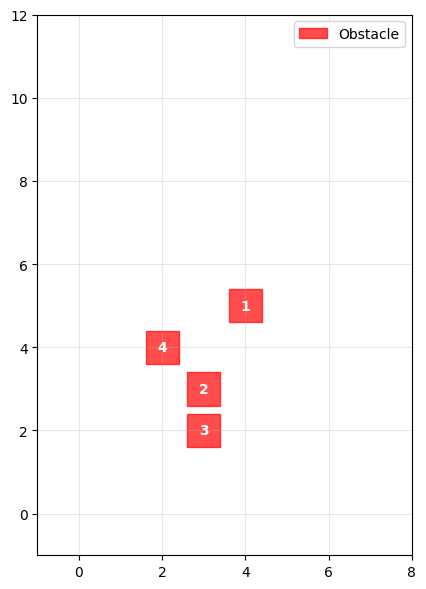

In [ ]:
obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)}
draw_obstacles(obstacles)

#📝 Mission 4 : 이동 경로 그리기 함수 만들기


🎯 조건:
1. Import 설정:
  - import matplotlib.pyplot as plt
2. 함수 정의:
  - def draw_path(path):
  - 매개변수: path (이동 경로 좌표들의 리스트)
3. 캔버스 설정:
  - 크기: figsize=(8, 6)
  - 축 범위: X(-18), Y(-112)
  - 정사각형 비율: ax.set_aspect('equal')
  - 격자: grid(True, alpha=0.3)
  - 제목: "Movement Path"
4. 경로 그리기 (2개 이상 점):
  - 경로선: 초록색 점선 ('g--')
  - 선 두께: linewidth=3, 투명도: alpha=0.8
  - 리스트 컴프리헨션으로 x, y 좌표 분리
  - ax.plot(path_x, path_y, ...) 사용
5. 시작점과 끝점 표시:
  - 시작점: 파란색 원 ('bo', markersize=10)
  - 끝점: 빨간색 원 ('ro', markersize=10)
  - 라벨에 좌표 정보 포함
6. 점 번호 표시:
  - 각 경로 점에 번호 (1, 2, 3...)
  - 위치: (x + 0.2, y + 0.2)
  - 노란색 둥근 박스 배경
  - enumerate() 함수로 번호 매기기

In [ ]:
import matplotlib.pyplot as plt

def draw_path(path):

  #캔버스 설정
  fig, ax = plt.subplots(figsize = (8, 6))
  ax.set_xlim(-1,8)
  ax.set_ylim(-1, 12)
  ax.set_aspect('equal')
  ax.grid(True,alpha=0.3)
  ax.set_title("Movement Path")

  #경로 그리기
  #x, y좌표 분리
  path_x, path_y = zip(*path)
  #초록선, 두께 - 3, 투명도 - 0.8
  ax.plot(path_x, path_y, 'g--', linewidth=3, alpha=0.8)

  #시작점과 끝점 표시
  #path[0][0] > 시작점 튜플에 첫번째요소(x1) / path[0][1] > 시작점에 두번째 요소(y1)
  ax.plot(path[0][0], path[0][1], 'bo', markersize=10, label=f"Start : {path[0]}")
  ax.plot(path[-1][0], path[-1][1], 'ro', markersize=10, label=f"End : {path[-1]}")

  #점 번호 표시
  for idx, (x, y) in enumerate(path, start=1):
      if idx == 1:            # 시작점
          c, m = 'blue', 'o'
      elif idx == len(path):  # 끝점
          c, m = 'red', 'o'
      else:                   # 나머지
          c, m = 'yellow', 'o'

      ax.plot(x, y, marker=m, color=c, markersize=10)
      ax.text(x + 0.2, y + 0.2, str(idx))


  ax.legend()
  plt.tight_layout()
  plt.show()

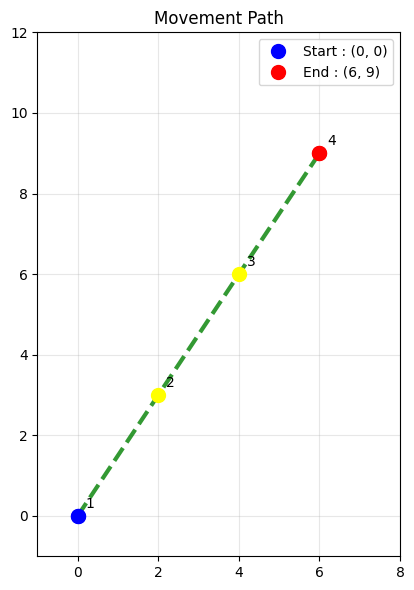

In [ ]:
sample_path = [(0, 0), (2, 3), (4, 6), (6, 9)]
draw_path(sample_path)

#센서 빔들 그리기 # 📝 Mission: 센서 그리기 함수 만들기


🎯 조건:
1. 함수 정의:
  - def draw_sensors(x, y, sensors):
2. 캔버스: figsize=(6, 5), 격자, 제목 "Sensors"
3. 차량 위치: 검은색 원점 'ko', markersize=15
4. 센서 선 그리기:
  - 전방: 'b-' (x, y) → (x, y + sensors['front'])
  - 좌측: 'g-' (x, y) → (x - sensors['left'], y)
  - 우측: 'r-' (x, y) → (x + sensors['right'], y)
  - 모든 선: linewidth=3

In [ ]:
import matplotlib.pyplot as plt

def draw_sensors(x, y, sensors):

  # 캔버스
  fig, ax = plt.subplots(figsize=(6, 5))
  ax.grid(True, alpha=0.3)
  ax.set_title("Sensors")

  # 차량 위치
  ax.plot(x, y, 'ko', markersize=15, label="Car")


  ax.legend()
  plt.tight_layout()
  plt.show()

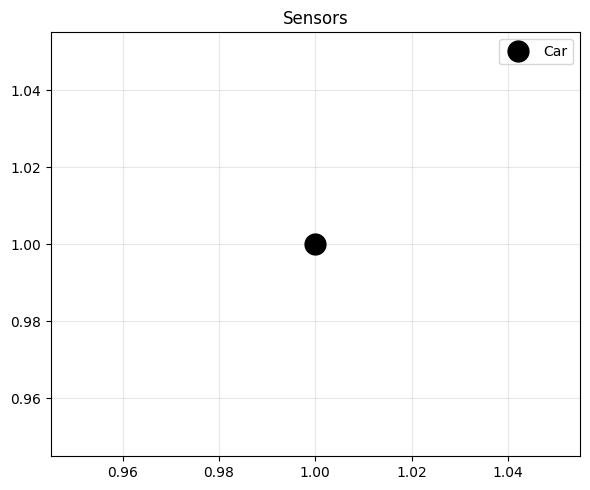

In [ ]:
draw_sensors(1,1, sensors=1)